<a href="https://colab.research.google.com/github/zuozuo11/BSAN6070_Zuo/blob/main/890_final_cds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf


# Loading the data


In [2]:
cds_dt =pd.read_csv("/content/cds_dataset.csv")

In [10]:
print(cds_dt.head(20))
print(cds_dt.describe())
print(cds_dt.info())

           Date  ParSpread  NumericRating  Amihud_measure  FundingLiquidity  \
0    2020-02-03   0.000815           13.0        0.006008          0.026199   
8    2020-02-03   0.006969           13.0        0.006008          0.026199   
15   2020-02-03   0.002175           13.0        0.006008          0.026199   
55   2020-02-03   0.001309           13.0        0.006008          0.026199   
59   2020-02-03   0.005089           13.0        0.006008          0.026199   
69   2020-02-03   0.002041           13.0        0.032925          0.026199   
75   2020-02-03   0.008183           13.0        0.005831          0.026199   
77   2020-02-03   0.000727           13.0        0.005831          0.026199   
89   2020-02-03   0.000773           13.0        0.005831          0.026199   
108  2020-02-03   0.001538           13.0        0.005831          0.026199   
125  2020-02-03   0.008683           13.0        0.005831          0.026199   
149  2020-02-03   0.003124           13.0        0.0

# Data processing

In [6]:
cds_dt.dropna(inplace=True)  # Remove missing values
cds_dt.drop_duplicates(inplace=True)  # Remove duplicates


# Exploratory Data Analysis

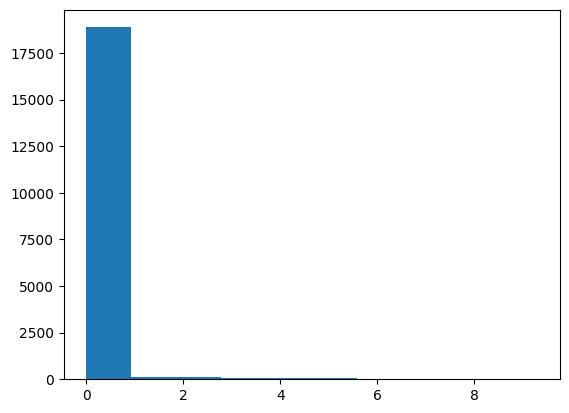

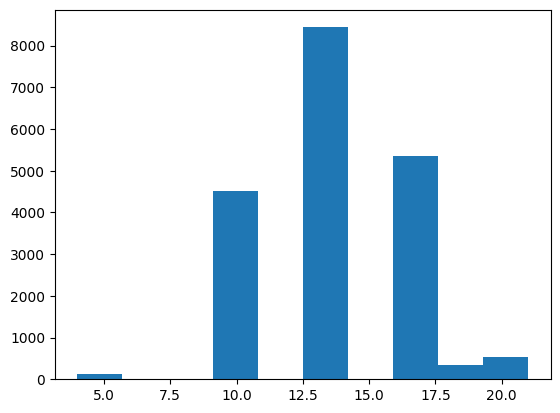

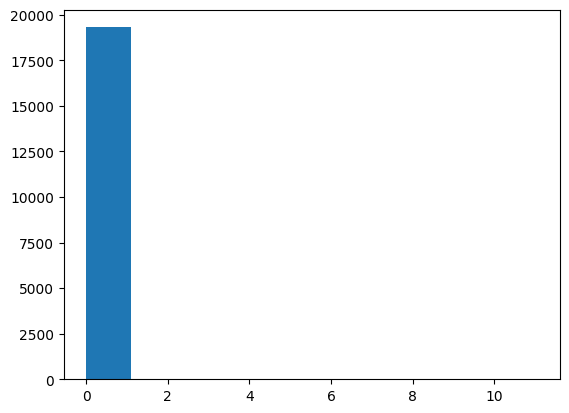

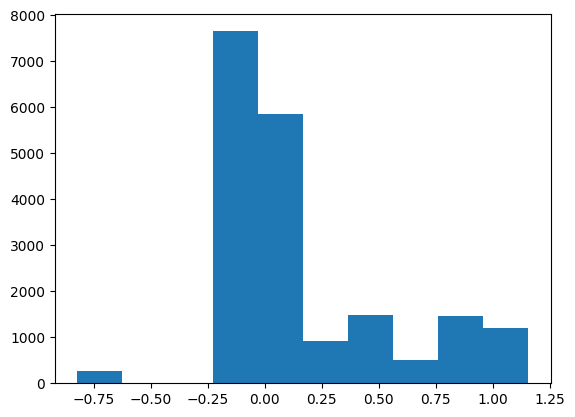

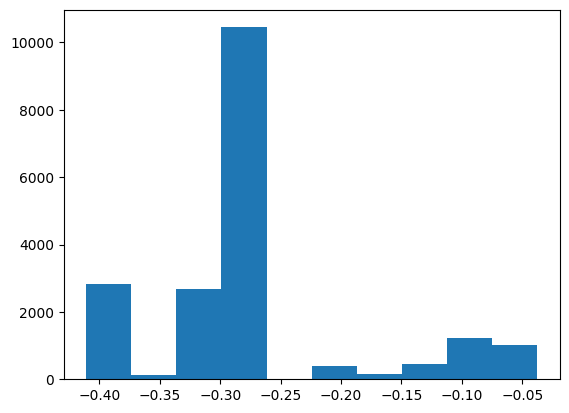

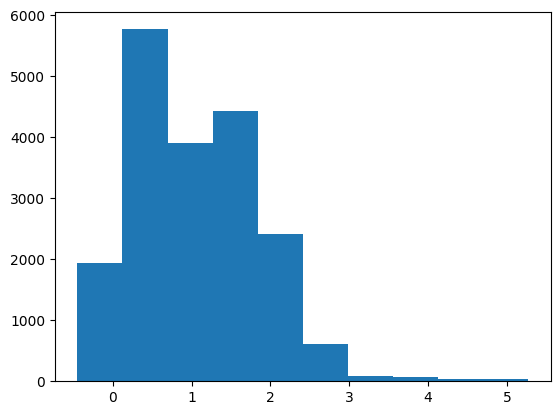

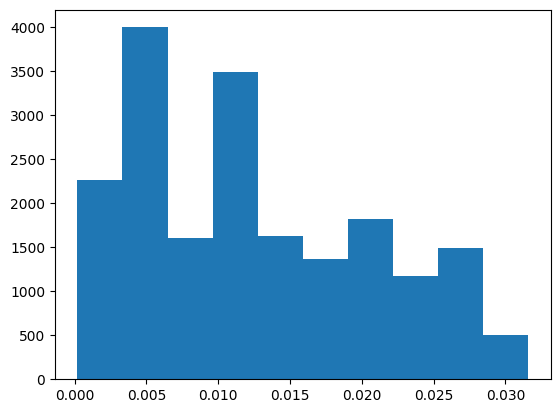

In [9]:
plt.hist(cds_dt['ParSpread'])
plt.show()

plt.hist(cds_dt['NumericRating'])
plt.show()


plt.hist(cds_dt['Amihud_measure'])
plt.show()


plt.hist(cds_dt['FundingLiquidity'])
plt.show()


plt.hist(cds_dt['Market_Liq_Daily'])
plt.show()


plt.hist(cds_dt['beta_CP'])
plt.show()


plt.hist(cds_dt['etf_liq'])
plt.show()

# Preparing Data for Modeling

In [11]:
#Splitting data into features (X) and target (y).
X = cds_dt.drop(['Date', 'ParSpread'], axis=1)
y = cds_dt['ParSpread']


In [12]:
#Splitting data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
X_train

array([[ 0.95563582,  0.21137407, -0.29360817,  2.081239  , -0.04763235,
        -0.33820645],
       [ 0.95563582,  0.04489552, -0.55665962, -0.17182972, -0.93112738,
        -1.45534914],
       [ 0.95563582,  0.0493883 , -0.4936868 , -0.17631883,  0.32857875,
         1.25399037],
       ...,
       [-0.14354451,  0.0203099 , -0.42613361, -0.16424472, -0.1204869 ,
        -1.39064662],
       [-1.24272485,  0.01043848, -0.24349237, -0.17631883, -0.084658  ,
         1.31641664],
       [-0.14354451, -0.08553823, -0.68480331, -0.44241858,  0.33264289,
        -0.71961942]])

#Linear regression

In [17]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = lr_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.22993099144885756
R^2 Score: 0.09548861324795233


# Support Vector Machine

In [19]:
svm_model = SVR()
svm_model.fit(X_train, y_train)


# Making predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluating the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"Mean Squared Error for SVM: {mse_svm}")
print(f"R^2 Score for SVM: {r2_svm}")


Mean Squared Error for SVM: 0.17599139919870832
R^2 Score for SVM: 0.30767825797391957


# Decision tree model

In [20]:
# Training the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
# Making predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluating the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Mean Squared Error for Decision Tree: {mse_dt}")
print(f"R^2 Score for Decision Tree: {r2_dt}")


Mean Squared Error for Decision Tree: 0.05170054313552753
R^2 Score for Decision Tree: 0.7966184128869314


# Random Forest Model

In [21]:
rf_model = RandomForestRegressor(random_state=42)  # You can set random_state for reproducibility
rf_model.fit(X_train, y_train)


# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error for Random Forest: {mse_rf}")
print(f"R^2 Score for Random Forest: {r2_rf}")


Mean Squared Error for Random Forest: 0.04247793051258487
R^2 Score for Random Forest: 0.8328986815035709


# Neural network model


In [22]:
# Define the model architecture
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_model.fit(X_train, y_train, epochs=10)

# Making predictions on the test set
y_pred_nn = nn_model.predict(X_test).flatten()  # Flatten the predictions array

# Evaluating the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Mean Squared Error for Neural Network: {mse_nn}")
print(f"R^2 Score for Neural Network: {r2_nn}")

Epoch 1/10
423/423 [==============================] - 3s 5ms/step - loss: 0.2382
Epoch 2/10
423/423 [==============================] - 1s 3ms/step - loss: 0.2147
Epoch 3/10
423/423 [==============================] - 1s 3ms/step - loss: 0.2117
Epoch 4/10
423/423 [==============================] - 1s 3ms/step - loss: 0.2056
Epoch 5/10
423/423 [==============================] - 1s 2ms/step - loss: 0.1999
Epoch 6/10
423/423 [==============================] - 1s 2ms/step - loss: 0.1929
Epoch 7/10
423/423 [==============================] - 1s 2ms/step - loss: 0.1935
Epoch 8/10
423/423 [==============================] - 1s 2ms/step - loss: 0.1890
Epoch 9/10
423/423 [==============================] - 1s 2ms/step - loss: 0.2218
Epoch 10/10
182/182 [==============================] - 0s 2ms/step
Mean Squared Error for Neural Network: 0.16560582833488424
R^2 Score for Neural Network: 0.34853341649368186
